In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from matplotlib import cm
import copy
import xarray as xr
from mpl_toolkits.basemap import Basemap
from colorbars import cmap_correlations256
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle

### Plot the polar stereographic maps for the Southern Hemisphere in Figure 2, for panels a)-c) and d)-f)

In [2]:
savePATH='./' # for plots

In [3]:
with open('../data/data_Fig2.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_Fig2 = pickle.load(f)

In [4]:
# set nan to white
cmap_diff=copy.copy(plt.cm.RdBu_r)
cmap_diff.set_bad('white',1.)
cmap_diff.set_under('purple')
cmap_diff.set_over('black')

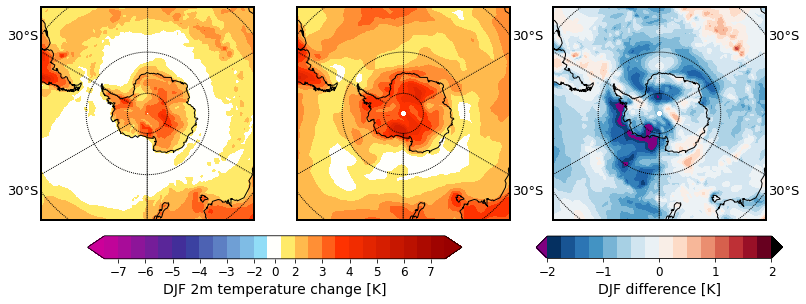

In [5]:
projectiontype='spstere'
season='DJF'
levels=[-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5]
cmap=cmap_correlations256
coordinatesize=13
cticksize=16
clabelsize=18

# ------------------------------------------------
fig=plt.figure(figsize=(13,4))
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)


# ------------------------------------------------
experiment='HRscen'
ax1 = fig.add_subplot(131)

xxH,yyH=np.meshgrid(data_Fig2[experiment]['lon'], data_Fig2[experiment]['lat'])
xxx,yyy=map(xxH,yyH)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

HRfield=data_Fig2[experiment][season]
cs=map.contourf(xxx, yyy, HRfield, levels=levels, cmap=cmap, extend='both') 

map.drawmapboundary(linewidth=2.0)

# ------------------------------------------------
experiment='LRscen'
ax2 = fig.add_subplot(132)
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)

xxL,yyL=np.meshgrid(data_Fig2[experiment]['lon'], data_Fig2[experiment]['lat'])

# interpolate LRscen to HRscen grid
tmp= data_Fig2[experiment][season]
grid_int = griddata((xxL.flatten(),yyL.flatten()), tmp.flatten(), (xxH.flatten(), yyH.flatten()), method='linear')

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

# LR interpolated to HR grid
xxx,yyy=map(xxH,yyH)
cs2=map.contourf(xxx, yyy, grid_int.reshape((192, 385)), levels=levels, cmap=cmap, extend='both')

map.drawmapboundary(linewidth=2.0)

# ------------------------------------------------
# DIFFERENCE
ax3 = fig.add_subplot(133)

map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)


levels=[-2.,-1.75,-1.5,-1.25,-1.,-0.75,-0.5,-0.25,0.,.25,.5,.75,1.,1.25,1.5,1.75,2.] # np.arange(-2., 2.+0.25, 0.25)
xxx,yyy=map(xxH,yyH)
cs=map.contourf(xxx, yyy, HRfield - grid_int.reshape((192, 385)), levels=levels, cmap=cmap_diff, extend='both')
map.drawmapboundary(linewidth=2.)

# HORIZONTAL COLORBAR OF THIRD SUBPLOT
axins3 = inset_axes(ax3,
                    width="77%",  # width = 50% of parent_bbox width
                    height="14%",  # height : 5%
                    loc='lower center',
                    bbox_to_anchor=(-0.25, -0.18, 1.5, .75),  # Anchor for the colorbar
                    bbox_transform=ax3.transAxes,
                    borderpad=0)

bounds=levels
norm = mpl.colors.BoundaryNorm(bounds, cmap_diff.N)
tick_bounds= np.linspace(levels[0], levels[-1], num=5)

cb = mpl.colorbar.ColorbarBase(axins3, cmap=cmap_diff, norm=norm, boundaries=[-10] + bounds + [10], ticks=tick_bounds, orientation='horizontal', extend='both')
font_size = 12 
cb.ax.tick_params(labelsize=font_size)
cb.set_label(season+' difference [K]', fontsize=14)

# -------------------------------------------------
# colorbar
fig.subplots_adjust(bottom=0.03)
cbar_ax = fig.add_axes([0.175, -0.05, 0.4, 0.08]) # start of axis left, start bottom, width colorbar, height colorbar
cbar=fig.colorbar(cs2, cax=cbar_ax, ticks=[-7,-6,-5,-4,-3,-2, 0, 2, 3, 4, 5, 6, 7], orientation='horizontal')
cbar_ax.tick_params(labelsize=12) 
cbar.set_label(season+' 2m temperature change [K]', fontsize=14)

plt.show()

In [6]:
saveFIG=True
if saveFIG==True:
   fig.savefig(savePATH+'Figure2_def.pdf', transparent=True, bbox_inches = 'tight')

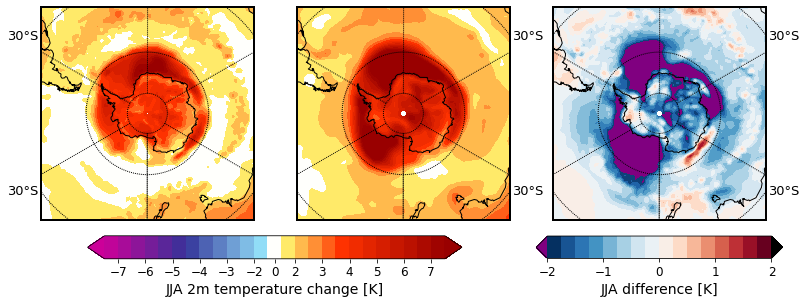

In [7]:
projectiontype='spstere'
season='JJA'
levels=[-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5]
cmap=cmap_correlations256
coordinatesize=13
cticksize=16
clabelsize=18

# ------------------------------------------------
fig=plt.figure(figsize=(13,4))
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)


# ------------------------------------------------
experiment='HRscen'
ax1 = fig.add_subplot(131)

xxH,yyH=np.meshgrid(data_Fig2[experiment]['lon'], data_Fig2[experiment]['lat'])
xxx,yyy=map(xxH,yyH)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

HRfield=data_Fig2[experiment][season]
cs=map.contourf(xxx, yyy, HRfield, levels=levels, cmap=cmap, extend='both') 

map.drawmapboundary(linewidth=2.0)

# ------------------------------------------------
experiment='LRscen'
ax2 = fig.add_subplot(132)
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)

xxL,yyL=np.meshgrid(data_Fig2[experiment]['lon'], data_Fig2[experiment]['lat'])

# interpolate LRscen to HRscen grid
tmp= data_Fig2[experiment][season]
grid_int = griddata((xxL.flatten(),yyL.flatten()), tmp.flatten(), (xxH.flatten(), yyH.flatten()), method='linear')

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

# LR interpolated to HR grid
xxx,yyy=map(xxH,yyH)
cs2=map.contourf(xxx, yyy, grid_int.reshape((192, 385)), levels=levels, cmap=cmap, extend='both')

map.drawmapboundary(linewidth=2.0)

# ------------------------------------------------
# DIFFERENCE
ax3 = fig.add_subplot(133)

map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)


levels=[-2.,-1.75,-1.5,-1.25,-1.,-0.75,-0.5,-0.25,0.,.25,.5,.75,1.,1.25,1.5,1.75,2.] # np.arange(-2., 2.+0.25, 0.25)
xxx,yyy=map(xxH,yyH)
cs=map.contourf(xxx, yyy, HRfield - grid_int.reshape((192, 385)), levels=levels, cmap=cmap_diff, extend='both')
map.drawmapboundary(linewidth=2.)

# HORIZONTAL COLORBAR OF THIRD SUBPLOT
axins3 = inset_axes(ax3,
                    width="77%",  # width = 50% of parent_bbox width
                    height="14%",  # height : 5%
                    loc='lower center',
                    bbox_to_anchor=(-0.25, -0.18, 1.5, .75),  # Anchor for the colorbar
                    bbox_transform=ax3.transAxes,
                    borderpad=0)

bounds=levels
norm = mpl.colors.BoundaryNorm(bounds, cmap_diff.N)
tick_bounds= np.linspace(levels[0], levels[-1], num=5)

cb = mpl.colorbar.ColorbarBase(axins3, cmap=cmap_diff, norm=norm, boundaries=[-10] + bounds + [10], ticks=tick_bounds, orientation='horizontal', extend='both')
font_size = 12 
cb.ax.tick_params(labelsize=font_size)
cb.set_label(season+' difference [K]', fontsize=14)

# -------------------------------------------------
# colorbar
fig.subplots_adjust(bottom=0.03)
cbar_ax = fig.add_axes([0.175, -0.05, 0.4, 0.08]) # start of axis left, start bottom, width colorbar, height colorbar
cbar=fig.colorbar(cs2, cax=cbar_ax, ticks=[-7,-6,-5,-4,-3,-2, 0, 2, 3, 4, 5, 6, 7], orientation='horizontal')
cbar_ax.tick_params(labelsize=12) 
cbar.set_label(season+' 2m temperature change [K]', fontsize=14)

plt.show()

In [8]:
saveFIG=True
if saveFIG==True:
   fig.savefig(savePATH+'Figure2_abc.pdf', transparent=True, bbox_inches = 'tight')

### Add information on the spatial resolution in multiples of the local Rossby radius for Figure 2, panels g), h), and i)

In [9]:
# load the data
CORE_res=xr.open_dataset('../data/resolution_core_025.nc') # LR ocean resolution
BOLD_res=xr.open_dataset('../data/resolution_bold_025.nc') # HR ocean resolution
L_R=xr.open_dataset('../data/rossrad_miss_025.nc') # Rossby radius

In [10]:
CORE_res.resolut

<xarray.DataArray 'resolut' (y: 676, x: 1440)>
[973440 values with dtype=float64]
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
Dimensions without coordinates: y, x

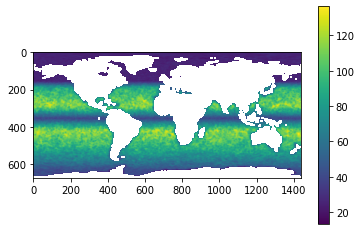

In [11]:
plt.imshow(np.flipud(CORE_res.resolut)/1000.)
plt.colorbar()
plt.show()

In [12]:
BOLD_res.resolut

<xarray.DataArray 'resolut' (y: 676, x: 1440)>
[973440 values with dtype=float64]
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
Dimensions without coordinates: y, x

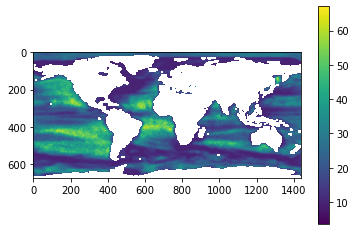

In [13]:
plt.imshow(np.flipud(BOLD_res.resolut)/1000.)
plt.colorbar()
plt.show()

In [14]:
L_R.var100

<xarray.DataArray 'var100' (time: 1, y: 676, x: 1440)>
[973440 values with dtype=float64]
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * time     (time) float64 2.015e+07
Dimensions without coordinates: y, x
Attributes:
    code:     100

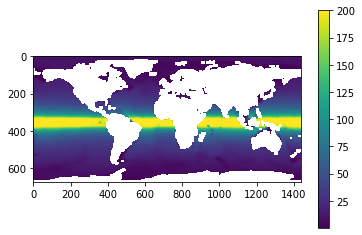

In [15]:
plt.imshow(np.flipud(L_R.var100[0,:,:]))
plt.colorbar()
plt.show()

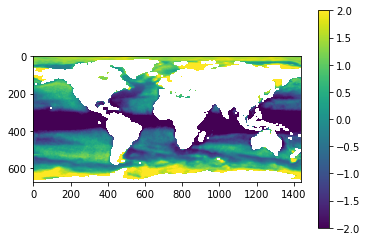

In [16]:
plt.imshow(np.log2(np.flipud(BOLD_res.resolut)/1000. / np.flipud(L_R.var100[0,:,:])))
plt.clim(-2., 2.)
plt.colorbar()
plt.show()

In [17]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

bottom = cm.get_cmap(cmap_correlations256,27)
newcolors = np.vstack((bottom(np.linspace(0, 1, 27))))

newcolors2 = [newcolors[10],newcolors[12],newcolors[16],newcolors[17]]
newcmp = ListedColormap(newcolors2, name='OrangeBlue')

newcmp.set_bad('white',1.)
newcmp.set_under(newcolors[6])
newcmp.set_over(newcolors[18])

newcolors3 = newcolors[15:23]
newcmp2 = ListedColormap(newcolors3, name='OrangeRed')
newcmp2.set_bad('white',1.)
newcmp2.set_under(newcolors[14])
newcmp2.set_over(newcolors[24])

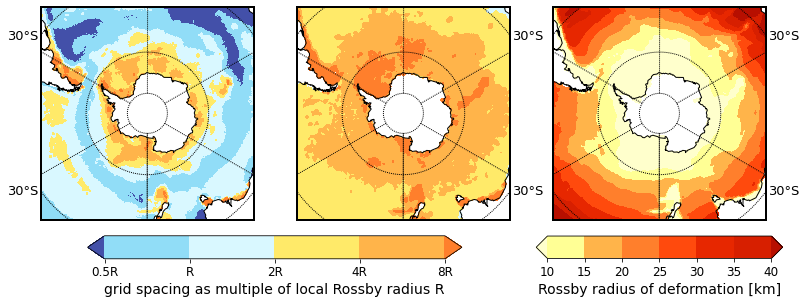

In [18]:
projectiontype='spstere'
levels=[-1.,0.,1.,2.,3.]
cmap=newcmp
coordinatesize=13
cticksize=16
clabelsize=18

# ------------------------------------------------
fig=plt.figure(figsize=(13,4))
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)

# ------------------------------------------------
ax1 = fig.add_subplot(131)

xxH,yyH=BOLD_res.lon.data,BOLD_res.lat.data
xxx,yyy=map(xxH,yyH)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

cs=map.contourf(xxx, yyy, np.log2(BOLD_res.resolut.data/1000. /L_R.var100[0,:,:].data), levels=levels, cmap=cmap, extend='both') 

map.drawmapboundary(linewidth=2.0)

# ------------------------------------------------
ax2 = fig.add_subplot(132)
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)

xxL,yyL=CORE_res.lon.data,CORE_res.lat.data
xxx,yyy=map(xxL,yyL)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

cs2=map.contourf(xxx, yyy, np.log2(CORE_res.resolut.data/1000. /L_R.var100[0,:,:].data), levels=levels, cmap=cmap, extend='both')

map.drawmapboundary(linewidth=2.0)


# ------------------------------------------------
# DIFFERENCE
ax3 = fig.add_subplot(133)
map = Basemap(projection=projectiontype,boundinglat=-40,lon_0=180)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0], fontsize=coordinatesize)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,0], fontsize=coordinatesize)

levels=[10.,15.,20.,25.,30.,35.,40.]

cs=map.contourf(xxx, yyy, L_R.var100[0,:,:].data , levels=levels, cmap=newcmp2, extend='both')
map.drawmapboundary(linewidth=2.0)

# HORIZONTAL COLORBAR OF THIRD SUBPLOT
axins3 = inset_axes(ax3,
                    width="77%",  # width = 50% of parent_bbox width
                    height="14%",  # height : 5%
                    loc='lower center',
                    bbox_to_anchor=(-0.25, -0.18, 1.5, .75),  # Anchor for the colorbar
                    bbox_transform=ax3.transAxes,
                    borderpad=0)


cb=fig.colorbar(cs, cax=axins3, orientation='horizontal')
font_size = 12 
cb.ax.tick_params(labelsize=font_size)
cb.set_label(r'Rossby radius of deformation [km]', fontsize=14)

# -------------------------------------------------
# colorbar
fig.subplots_adjust(bottom=0.03)
cbar_ax = fig.add_axes([0.175, -0.05, 0.4, 0.08]) # start of axis left, start bottom, width colorbar, height colorbar
cbar=fig.colorbar(cs2, cax=cbar_ax, ticks=[-1.,0.,1.,2.,3.], orientation='horizontal') #ticks=[-7,-6,-5,-4,-3,-2, 0, 2, 3, 4, 5, 6, 7]
cbar_ax.tick_params(labelsize=12) 
cbar_ax.set_xticklabels(['0.5R', 'R', '2R', '4R', '8R'])  # horizontal colorbar

cbar.set_label(r'grid spacing as multiple of local Rossby radius R', fontsize=14)

plt.show()

In [19]:
saveFIG=True
if saveFIG==True:
   fig.savefig(savePATH+'Figure2_ghi.pdf', transparent=True, bbox_inches = 'tight')